# Check attrition in processed 2015-2021 obituaries

Author: Jaren Haber, PhD <br/>
Date: July 25, 2022 <br/>
Description: This notebook analyzes our scraped & processed obituaries from Legacy.com for attrition at the post/URL level, i.e. whether obituaries are removed or change over time. To assess this, we check two conditions: 

1. Do the listings from Legacy search (i.e., for DC) change over time? 
2. Do the listings themselves change over time?

If we can conclude that NEITHER condition is True, then we can conclude there is NO attrition. This would mean data scraped from Legacy.com at one point in time is the same as that scraped at another point in time, and there is no need to scrape them repeatedly over time.

## Import packages

In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

## Load data & set file paths

In [9]:
# Set root directory
#os.chdir('../') # This should be 'obituaries' folder
#root = os.getcwd()
root = '/home/jovyan/work/obituaries'
root

'/home/jovyan/work/obituaries'

### Set base directory paths

In [2]:
# 2015-2021 postprocessed for June and July runs
processed_june_stem = 'postprocessing/June_2022_postprocessed/'
processed_june_dir = os.path.join(root, processed_june_stem)

processed_july_stem = 'postprocessing/July_2022_postprocessed/'
processed_july_dir = os.path.join(root, processed_july_stem)

In [ ]:
# 2015-2021 URL lists for June and July runs
url_2015_stem = 'url_scraping/20150101-20151231/'
url_2016_stem = 'url_scraping/20160101-20161231/'
url_2017_stem = 'url_scraping/20170101-20171231/'
url_2018_stem = 'url_scraping/20180101-20181231/'
url_2019_stem = 'url_scraping/20190101-20191231/'
url_2020_stem = 'url_scraping/20200101-20201231/'
url_2021_stem = 'url_scraping/20210101-20211231/'

url_2015_dir = os.path.join(root, url_2015_stem)
url_2016_dir = os.path.join(root, url_2016_stem)
url_2017_dir = os.path.join(root, url_2017_stem)
url_2018_dir = os.path.join(root, url_2018_stem)
url_2019_dir = os.path.join(root, url_2019_stem)
url_2020_dir = os.path.join(root, url_2020_stem)
url_2021_dir = os.path.join(root, url_2021_stem)

### Set filepaths

In [ ]:
# 2015-2021 postprocessed for June and July runs
processed_june_stem = 'postprocessing/June_2022_postprocessed/'
processed_june_dir = os.path.join(root, processed_june_stem)

processed_july_stem = 'postprocessing/July_2022_postprocessed/'
processed_july_dir = os.path.join(root, processed_july_stem)

In [ ]:
processed_june_file_stem = 'final_df_duplicates_identified-'

# Join filepaths
processed_2015_june = os.path.join(root, processed_june_file_stem+'2015.csv')
processed_2016_june = os.path.join(root, processed_june_file_stem+'2016.csv')
processed_2017_june = os.path.join(root, processed_june_file_stem+'2017.csv')
processed_2018_june = os.path.join(root, processed_june_file_stem+'2018.csv')
processed_2019_june = os.path.join(root, processed_june_file_stem+'2019.csv')
processed_2020_june = os.path.join(root, processed_june_file_stem+'2020.csv')
fp2021_june = os.path.join(root, processed_june_file_stem+'2021.csv')

In [ ]:
# 2015-2021 URL lists for June and July runs
url_2015_stem = 'url_scraping/20150101-20151231/'
url_2016_stem = 'url_scraping/20160101-20161231/'
url_2017_stem = 'url_scraping/20170101-20171231/'
url_2018_stem = 'url_scraping/20180101-20181231/'
url_2019_stem = 'url_scraping/20190101-20191231/'
url_2020_stem = 'url_scraping/20200101-20201231/'
url_2021_stem = 'url_scraping/20210101-20211231/'

url_2015_dir = os.path.join(root, url_2015_stem)
url_2016_dir = os.path.join(root, url_2016_stem)
url_2017_dir = os.path.join(root, url_2017_stem)
url_2018_dir = os.path.join(root, url_2018_stem)
url_2019_dir = os.path.join(root, url_2019_stem)
url_2020_dir = os.path.join(root, url_2020_stem)
url_2021_dir = os.path.join(root, url_2021_stem)

### Load URL lists scraped in June 2022

### Load URL lists scraped in July 2022

### Load postprocessed data from June 2022 run

In [3]:
df2015 = pd.read_csv(fp2015)
df2016 = pd.read_csv(fp2016)
df2017 = pd.read_csv(fp2017)
df2018 = pd.read_csv(fp2018)
df2019 = pd.read_csv(fp2019)
df2020 = pd.read_csv(fp2020)
df2021 = pd.read_csv(fp2021)

In [4]:
list(df2015) # show all column names

['Unnamed: 0.2',
 'index',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'location',
 'birthdate',
 'deathdate',
 'pubdate',
 'url',
 'para',
 'site_published',
 'name',
 'all_dates_re',
 'para_ages',
 'age',
 'all_dates_su',
 'all_dates',
 'birthday',
 'bday_string',
 'bday_method',
 'deathday',
 'dday_string',
 'dday_method',
 'first_name',
 'sex',
 'funeral_home',
 'pred_race',
 'race_pred_value',
 'race_diff_highest',
 'grand_index',
 'name_processed',
 'name_identifiers',
 'birth_year',
 'death_year',
 'identifier',
 'identifier2',
 'name_processed2',
 'match_index_level_0',
 'match_index_level_1',
 'compare_processed_FL',
 'exact_DoD',
 'exact_DoB',
 'token_set_ratio_score',
 'token_set_match',
 'duplicate_remove']

### Load postprocessed data from July 2022 run

## Merge DataFrames

In [5]:
df = pd.concat([df2015,df2016,df2017,df2018,df2019,df2020,df2021],axis=0) # stick all rows together

df = df.sort_values(by='pubdate') # sort from first to last by publication date

# Cleaning up
df = df.drop_duplicates(subset='para', keep='last') # drop obituaries with duplicates
df['deathdate'].replace({'20201': None}, inplace =True) # remove outlier death date
df['deathday'].replace({'20201': None}, inplace =True) # remove outlier death date
df['pub_year'] = df['pubdate'].apply(pd.to_datetime).apply(lambda date: date.year)

df = df.reset_index(drop=True) # make new index; grand_index has duplicates in it
#df = df.set_index('grand_index', drop=False)

print("Number rows, cols:", df.shape)

# Define and inspect key columns
keycols = ['location', 'birthdate', 'deathdate', 'pubdate', 'para', 'name', 'age', 
           'birthday', 'bday_method', 'deathday', 'dday_method', 'sex', 'pred_race', 'grand_index']
df[keycols].head(20)

Number rows, cols: (81294, 46)


,location,birthdate,deathdate,pubdate,para,name,age,birthday,bday_method,deathday,dday_method,sex,pred_race,grand_index
0,"Washington, DC",NaN,NaN,"Apr. 1, 2015","JOSEPH ROGERS (Age 92) Of Washington, DC pass...",JOSEPH ROGERS,92.0,1923-03-28,deduced (death-age),2015-03-28 00:00:00,sutime,male,pctwhite,4125
1,"Washington, DC",NaN,NaN,"Apr. 1, 2015",JOHN E. GRAHAM Surrounded by family and clo...,JOHN E. GRAHAM,NaN,NaN,NaN,2015-03-23 00:00:00,sutime,male,pctwhite,3897
2,"Hospice Fund, GP",NaN,NaN,"Apr. 1, 2015","NORMAN CHESTER SCHIFF On Monday, March 30, 20...",NORMAN C. SCHIFF,NaN,NaN,NaN,2015-03-30 00:00:00,sutime,male,pctwhite,4141
3,"Washington, DC",NaN,NaN,"Apr. 1, 2015","NATHANIEL W. GOODALL On March 27, 2015, Nat...",NATHANIEL W. GOODALL,NaN,NaN,NaN,2015-03-27 00:00:00,sutime,male,pctwhite,3894
4,"Washington, DC",NaN,NaN,"Apr. 1, 2015","LAWRENCE N. GOLD (Age 68) Of Washington, DC d...",LAWRENCE N. GOLD,68.0,1947-03-29,deduced (death-age),2015-03-29 00:00:00,sutime,male,pctwhite,3892
5,"Gean, LT",NaN,NaN,"Apr. 1, 2015","BARBARA C. GEAN On Sunday, March 29, 2015, ...",BARBARA C. GEAN,NaN,NaN,NaN,2015-03-29 00:00:00,sutime,female,pctwhite,3886
6,"Hanover, NH",NaN,NaN,"Apr. 1, 2015",JANE YAHRES ESKEY Jane Yahres Eskey died Marc...,JANE Y. ESKEY,NaN,1954-01-01,sutime,2015-03-31 00:00:00,sutime,female,pctwhite,3857
7,"Laurel, MD",NaN,NaN,"Apr. 1, 2015","Riley L. Carr On March 30, 2015, Riley L. C...",Riley L. Carr,NaN,NaN,NaN,2015-03-30 00:00:00,sutime,mostly_male,pctwhite,3797
8,"Dale City, VA",NaN,NaN,"Apr. 1, 2015",JOSEPHINE SHANNON LITVINAS Josephine Shanno...,Josephine Shannon Litvinas,86.0,1928-09-28,sutime,2015-03-29 00:00:00,sutime,female,NaN,4005
9,NaN,NaN,NaN,"Apr. 1, 2015","RAY NAUGHTON Of Alexandria, Virginia, passe...",RAY NAUGHTON,NaN,NaN,NaN,2015-03-24 00:00:00,sutime,mostly_male,pctwhite,4069


## Save merged data to disk

In [6]:
fpmerged = os.path.join(root, stem+'2015-2021.csv')
fpdc = os.path.join(root, stem+'2015-2021_dc.csv')

mask = (df['deathday'].notnull() & df['pubdate'].notnull()) # create mask to filter out nulls for these key cols
df['lag'] = (df[mask]['pubdate'].apply(pd.to_datetime) - \
             df[mask]['deathday'].apply(pd.to_datetime)).dt.days # get # days in between death and obit publication

df.to_csv(fpmerged) # save full dataset

In [7]:
# Save only those obits confirmed to be in DC
dcdf = df[df['location']=='Washington, DC'] # limit to confirmed in DC
dcdf.to_csv(fpdc)

## Exploratory data analysis

In [8]:
# prepare data
dcdf = dcdf.dropna(subset=['death_year']) # remove if no deathyear
dcdf = dcdf[dcdf['pub_year']>2014] # remove if erroneous publication year

grouped = dcdf.groupby(by='death_year') # group obits by year of DOD

### How many obituaries are confirmed in DC each year?

<AxesSubplot:>

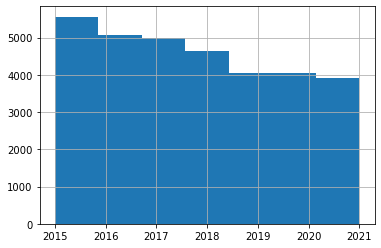

In [9]:
# Number published in observed range
dcdf['pub_year'].hist(bins=7)

<AxesSubplot:>

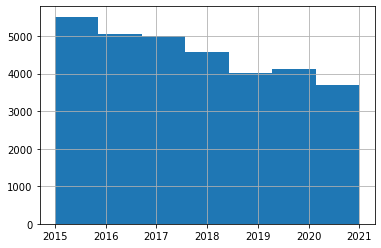

In [10]:
# Actual death year (in time range)
dcdf[dcdf['death_year']>2014]['death_year'].hist(bins=7)
#.apply(pd.to_datetime).apply(lambda date: date.year).hist()

### Describe the lag between death date and obituary publication date

CAVEAT: Where bday_method or dday_methodis "scraped" AND birthday or deathdayis January 1st of some year, we should assume we only know year of birth/death (ignore the Jan. 1st part of the date), since in most cases the website will only include the year in the HTML (i.e., Legacy will show something like "1950 -2020" in the left column below the name).

In [11]:
dcdf.lag.describe()

count    32268.000000
mean        37.486736
std        551.062371
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max      23835.000000
Name: lag, dtype: float64